# **Laboratorio 8: Una introducción al algoritmo de descenso de gradiente**
**Facultad de ingeniería**

Departamento de Ingeniería Biomédica

Universidad de los Andes

**IBIO-2340** Fundamentos del machine learning

**Nombres de los integrantes**


1.   John Anderson Acosta
2.   

**Número del grupo**

*Grupo 2*


#**1. Algoritmo de descenso de gradiente**

El algoritmo de descenso de gradiente es una técnica de optimización que se utiliza para calcular mínimos o máximos locales de una función objetivo en problemas sin restricciones; para ello, realiza saltos de forma iterativa para encontrar puntos donde el gradiente es aproximadamente 0. El cálculo de los posibles puntos se realiza siguiendo el siguiente pseudoalgoritmo:

**Requerimientos iniciales:** condición inicial $x_0$, parámetro $α$, condición de parada y número máximo de iteraciones ($N_{max}$).

**Resultado:** Punto $x$ donde el gradiente es aproximadamente 0.

A continuación se presenta el pseudoalgoritmo del algoritmo de descenso de gradiente, donde $x[k]$ es un vector en $R^n$ que corresponde al resultado de la iteración $k$ y $\nabla f$ es el gradiente de la función.

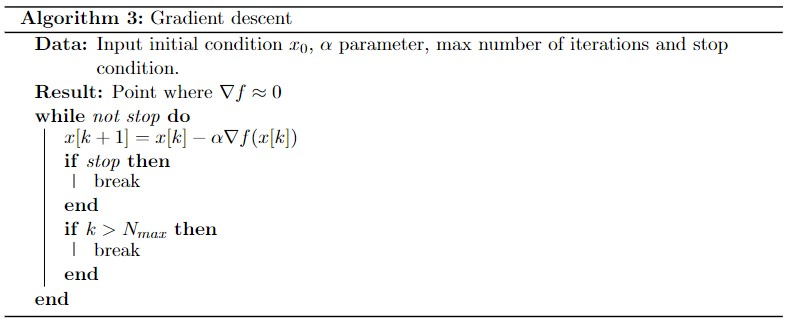

**1.1 Ejercicios**


- Se requiere resolver el siguiente problema de optimización:

\begin{align*}
  \min_x f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^TQ\mathbf{x}+B^T\mathbf{x}+C
  \end{align*}

\begin{align*}
   x \in R^2
  \end{align*}

- Donde los parámetros tienen los siguientes valores:

\begin{align}
Q = \begin{pmatrix}
1 & 3 \\
-2 & 1
\end{pmatrix}
\end{align}

\begin{align}
B = \begin{pmatrix}
1/2 \\
1
\end{pmatrix}
\end{align}

\begin{align}
C= 5
\end{align}


\begin{align}
x= [x_1, x_2]^T
\end{align}




1. ¿Para qué considera importante encontrar un punto donde el gradiente de una función dada es cero en un contexto de optimización?

Esto es importante porque en el algoritmo se busca llegar a un vector x que sea muy similar o cercano a la  función objetivo dada $f(x(k))$, considerando la estructura del algoritmo de descenso $x(k+1)=x(k) - α∇f(x(k))$, tener un gradiente de 0 cumple que el vector x evaluado en la iteración k estará lo más cerca posible al minimizador/maximizador x*. Ya que, el gradiente es la extensión de la derivada en $f:R^n->R$, sí la derivada en un punto es igual a 0 significa que se encuentra en un minimo o maximo de la función. Asimismo, este es quien viene siendo la solución minimizadora o maximizadora local o global del problema. Finalmente, se busca encontrar que $x(k+1)$ es lo más similar posible a $x(k)$, y este es en un gradiente de cero.

2. Determine si el problema es convexo o no, en caso de serlo, calcule teóricamente el minimizador.


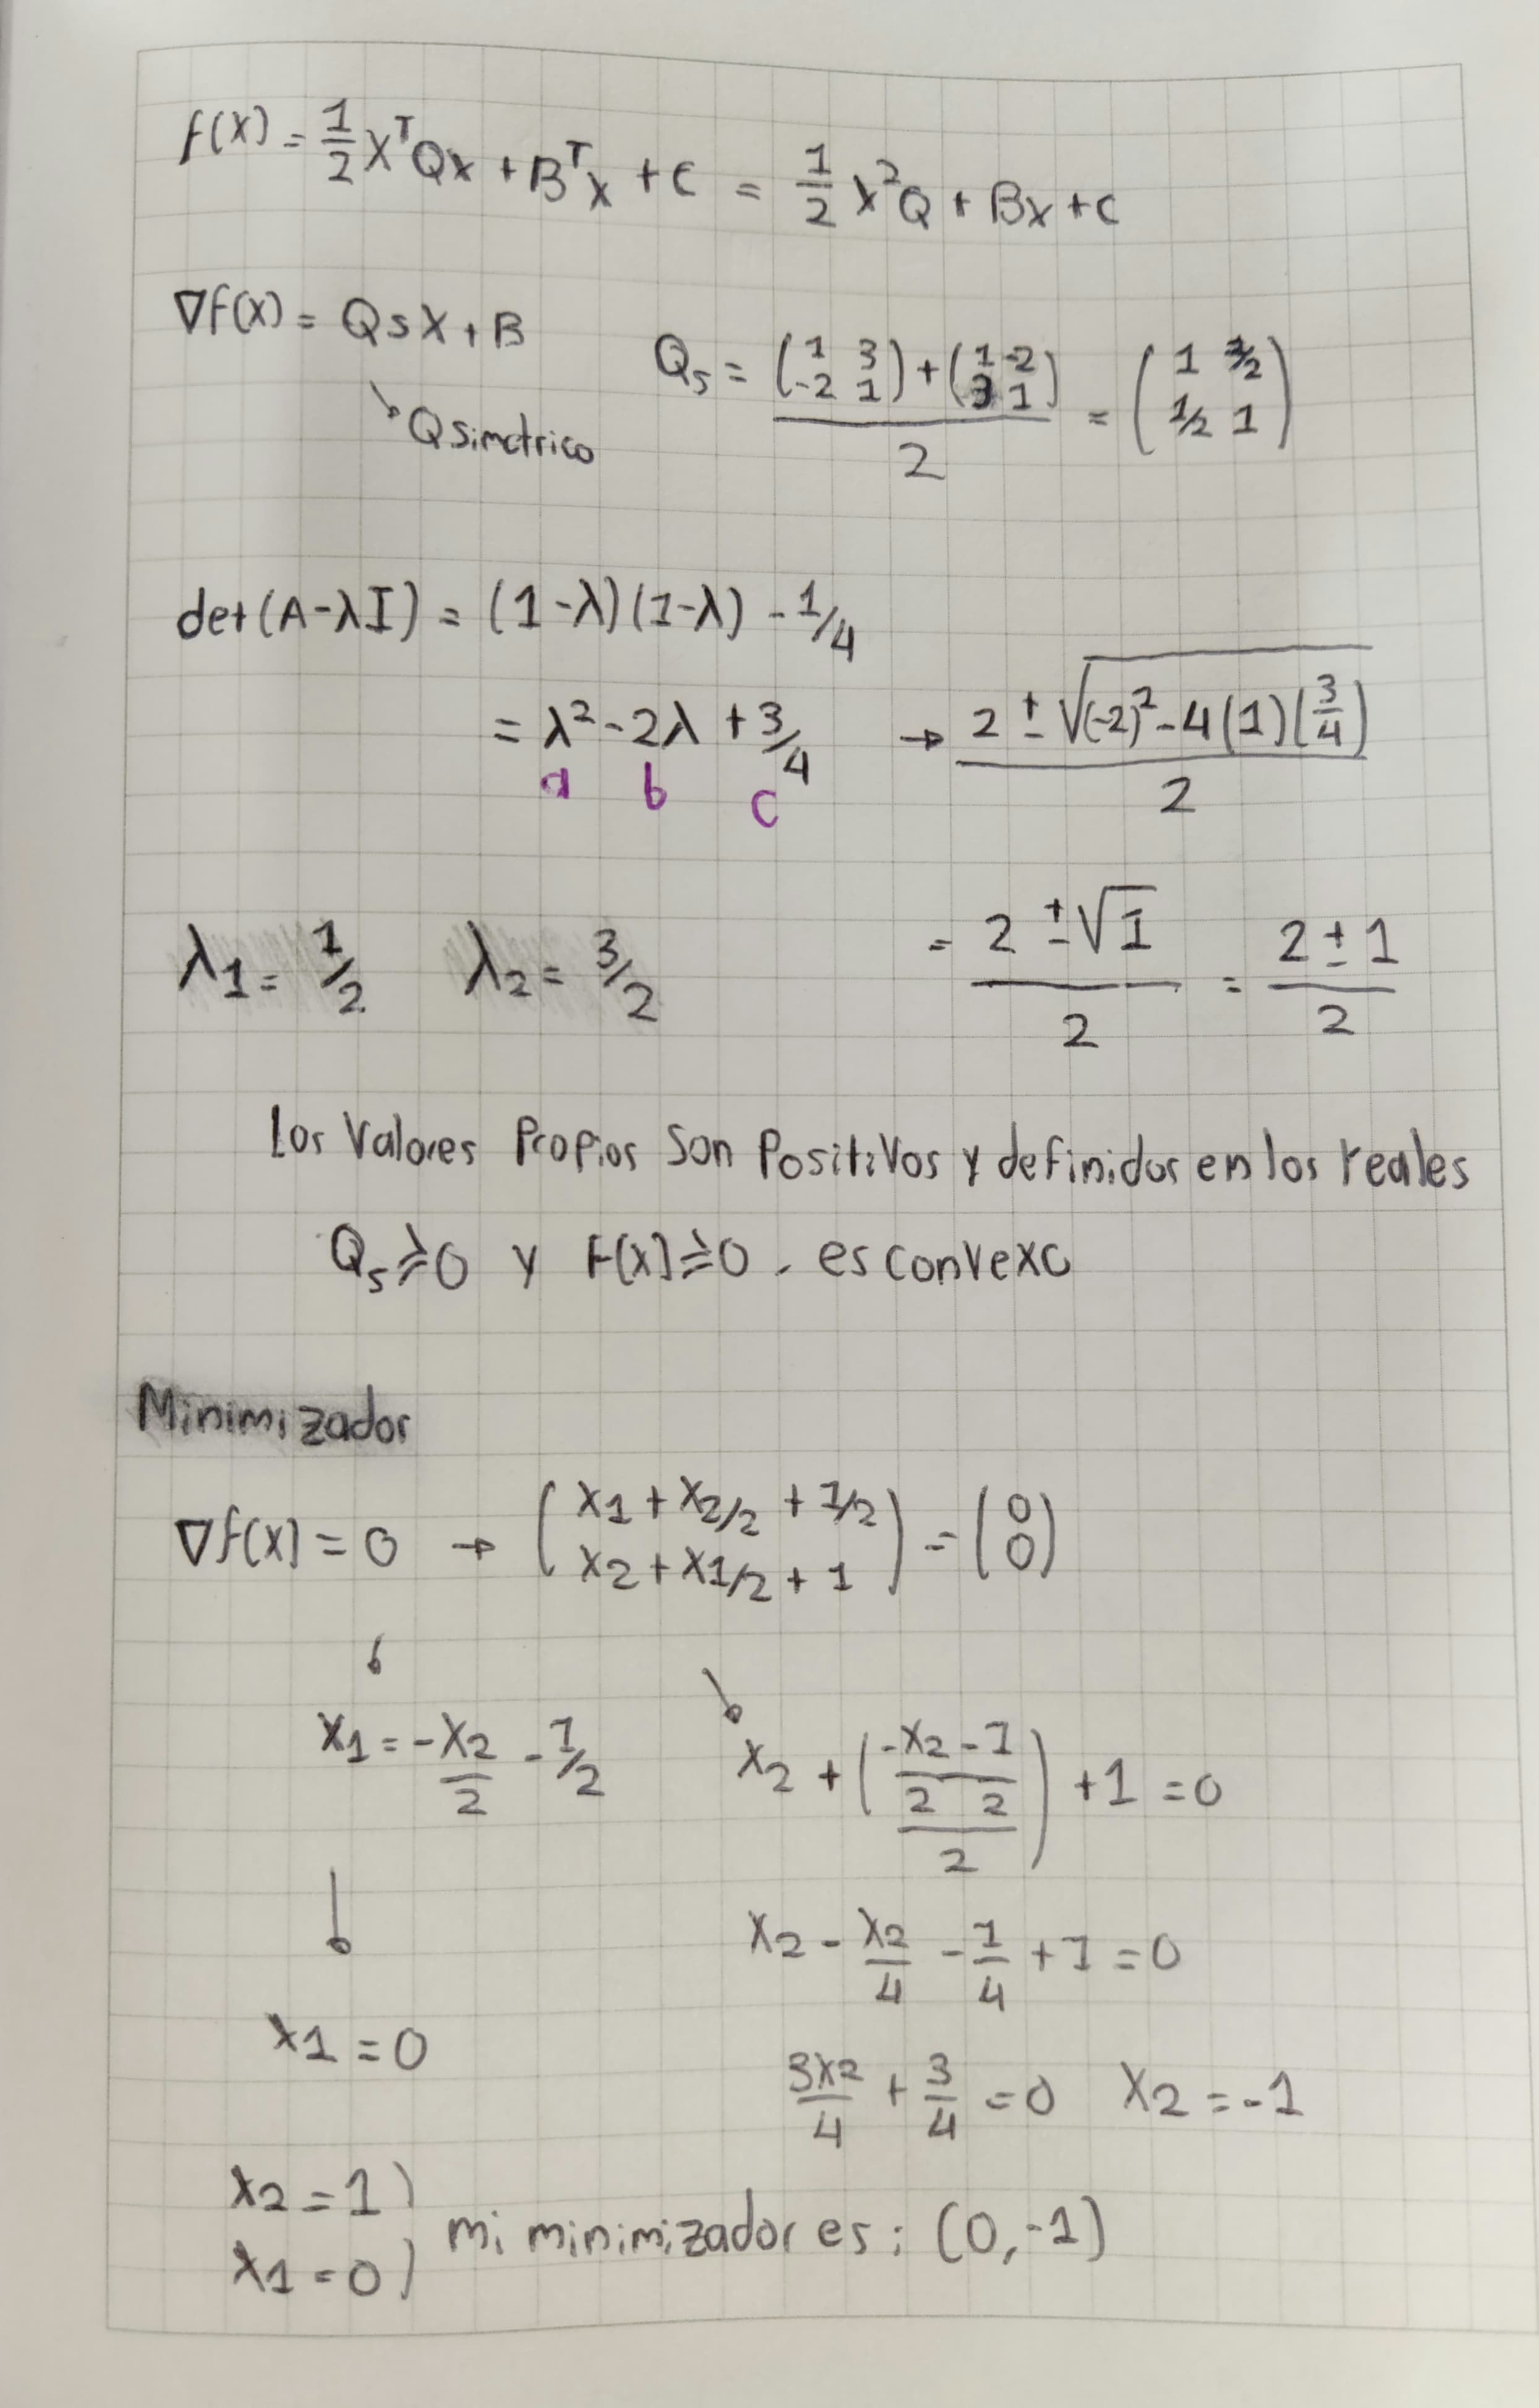

3. Diseñe una función que reciba como parámetro un punto $[x_1, x_2]^T$ y retorne el valor numérico del gradiente en ese punto, para esto, calcule teóricamente el gradiente de la forma cuadrática y evalúelo en el parámetro ingresado.

In [65]:
import numpy as np


def gradiente(X):
  x=[]
  x=np.array(X)
  B=np.array([1/2,1])
  Q_Simetrica=np.array([[1, 1/2], [1/2, 1]])
  Q_SimetricaX=np.dot(Q_Simetrica, x)
  return Q_SimetricaX + B

gradiente([1,2])

array([2.5, 3.5])

4. Diseñe una función que reciba como parámetro un punto inicial $X_0$, un parámetro $\alpha$, un número máximo de pasos $n$ y un parámetro $\epsilon$ que defina la tolerancia del algoritmo a la hora de establecer que el algoritmo converge. El algoritmo se debe detener si se cumple que $||x[k+1]-x[k]||_2 \leq ϵ$. Es decir, el algoritmo de descenso de gradiente converge si $x[k+1]$ es muy cercano a $x[k]$. Su función debe retornar una tupla con 3 elementos: el historial de los puntos por donde pasa el algoritmo (es decir, todos sus puntos $x[k]$), la función evaluada en cada punto $x[k]$ y un booleano que indique si se superó el número máximo de pasos permitido ($False$ si se superan los pasos, $True$ de lo contrario).  

In [66]:
import numpy as np

x=[]
def parametros_f(X):
  x=np.array(X)
  B=np.array([1/2,1])
  Q_Simetrica = np.array([[1, 1/2], [1/2, 1]])
  Q_SimetricaX=np.dot(Q_Simetrica, x)
  XQ_SimetricaX=np.dot(x,Q_SimetricaX)
  BX=np.dot(B,x)
  return XQ_SimetricaX+BX+5


def gradiente_descendiente1(X0, a, n, e):
    puntos = [X0]
    resultados = [parametros_f(X0)]
    for i in range(n):
        punto_a=puntos[-1]
        punto_n=punto_a-(a * gradiente(punto_a))
        puntos.append(punto_n)
        resultados.append(parametros_f(punto_n))
        if np.linalg.norm(punto_n - punto_a, 2)<= e:
            return puntos, resultados, True
    return puntos, resultados, False

5. Diseñe una función con la misma estructura de la función del punto anterior pero que implemente como condición de parada que $||∇f(x[k])||_2≤\epsilon$. Es decir, el algoritmo se debe detener si se cumple la condición.

In [67]:
def gradiente_descendiente2(X0, a, n, e):
    puntos = [X0]
    resultados = [parametros_f(X0)]
    for i in range(n):
        punto_a = puntos[-1]
        punto_n = punto_a - (a * gradiente(punto_a))
        puntos.append(punto_n)
        resultados.append(parametros_f(punto_n))
        if np.linalg.norm(gradiente(punto_a), 2)<=e:
            return puntos, resultados, True
    return puntos, resultados, False

6. Utilice sus funciones para determinar el posible minimizador local de la función cuadrática suministrada con los siguientes parámetros:

  - $\epsilon = 0.1$
  - $n = 100$
  - $X_0 = [2,2]^T$

  Ambas funciones deben ser invocadas con 3 valores distintos de $\alpha$, en este caso utilice $\alpha = [0.1, 0.5, 0.8]$

In [68]:
X0=[2,2]
n=100
e=0.1

GD1_a1= gradiente_descendiente1(X0,0.1, n, e)
GD1_a2= gradiente_descendiente1(X0,0.5, n, e)
GD1_a3= gradiente_descendiente1(X0,0.8, n, e)
print("Los resultados usando la primera función y alfas en orden correspondiente= [0.1,0.5,0.8] son","\n",  GD1_a1, "\n", GD1_a2, "\n", GD1_a3,"\n")

GD2_a1= gradiente_descendiente2(X0,0.1, n, e)
GD2_a2= gradiente_descendiente2(X0,0.5, n, e)
GD2_a3= gradiente_descendiente2(X0,0.8, n, e)
print("Los resultados usando la segunda función y alfas en orden correspondiente= [0.1,0.5,0.8] son","\n",  GD2_a1, "\n", GD2_a2, "\n", GD2_a3,"\n")

print("Entonces, los mínimizadores encontrados son: ", "\n", GD1_a1[0][-1], "\n", GD1_a2[0][-1], "\n", GD1_a3[0][-1], "\n", GD2_a1[0][-1], "\n", GD2_a2[0][-1], "\n", GD2_a3[0][-1])

Los resultados usando la primera función y alfas en orden correspondiente= [0.1,0.5,0.8] son 
 ([[2, 2], array([1.65, 1.6 ]), array([1.355 , 1.2575]), array([1.106625, 0.964   ]), array([0.8977625 , 0.71226875]), array([0.72237281, 0.49615375]), array([0.57532784, 0.31041973]), array([0.45227407, 0.15061137]), array([0.3495161 , 0.01293653]), array([ 0.26391766, -0.10583293]), array([ 0.19281754, -0.20844552]), array([ 0.13395806, -0.29724184]), array([ 0.08542435, -0.37421556])], [20.0, 15.3475, 12.05624375, 9.738013890625, 8.113902452304687, 6.983739159948144, 6.204039311968886, 5.672101643404839, 5.314544957370391, 5.079047862475569, 4.928399437349475, 4.836216721998789, 4.783864097530621], True) 
 ([[2, 2], array([0.25, 0.  ]), array([-0.125 , -0.5625]), array([-0.171875, -0.75    ]), array([-0.1484375 , -0.83203125])], [20.0, 5.1875, 4.77734375, 4.885009765625, 4.9315643310546875], True) 
 ([[2, 2], array([-0.8, -1.2]), array([-0.08, -0.72]), array([-0.128, -0.912]), array([-0.060

7. En un subplot de 2 columnas y 3 filas grafique curvas de nivel de la función suministrada y junto con ellas la trayectoria de búsqueda de su implementación, recuerde colocar los correspondientes ejes y títulos.

  **Hint:** cada uno de sus subplots debería lucir similar al que se presenta a continuación:

  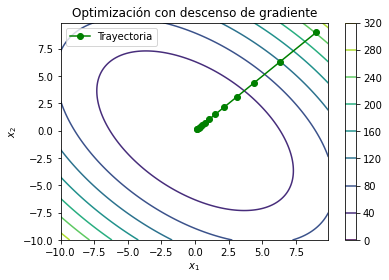

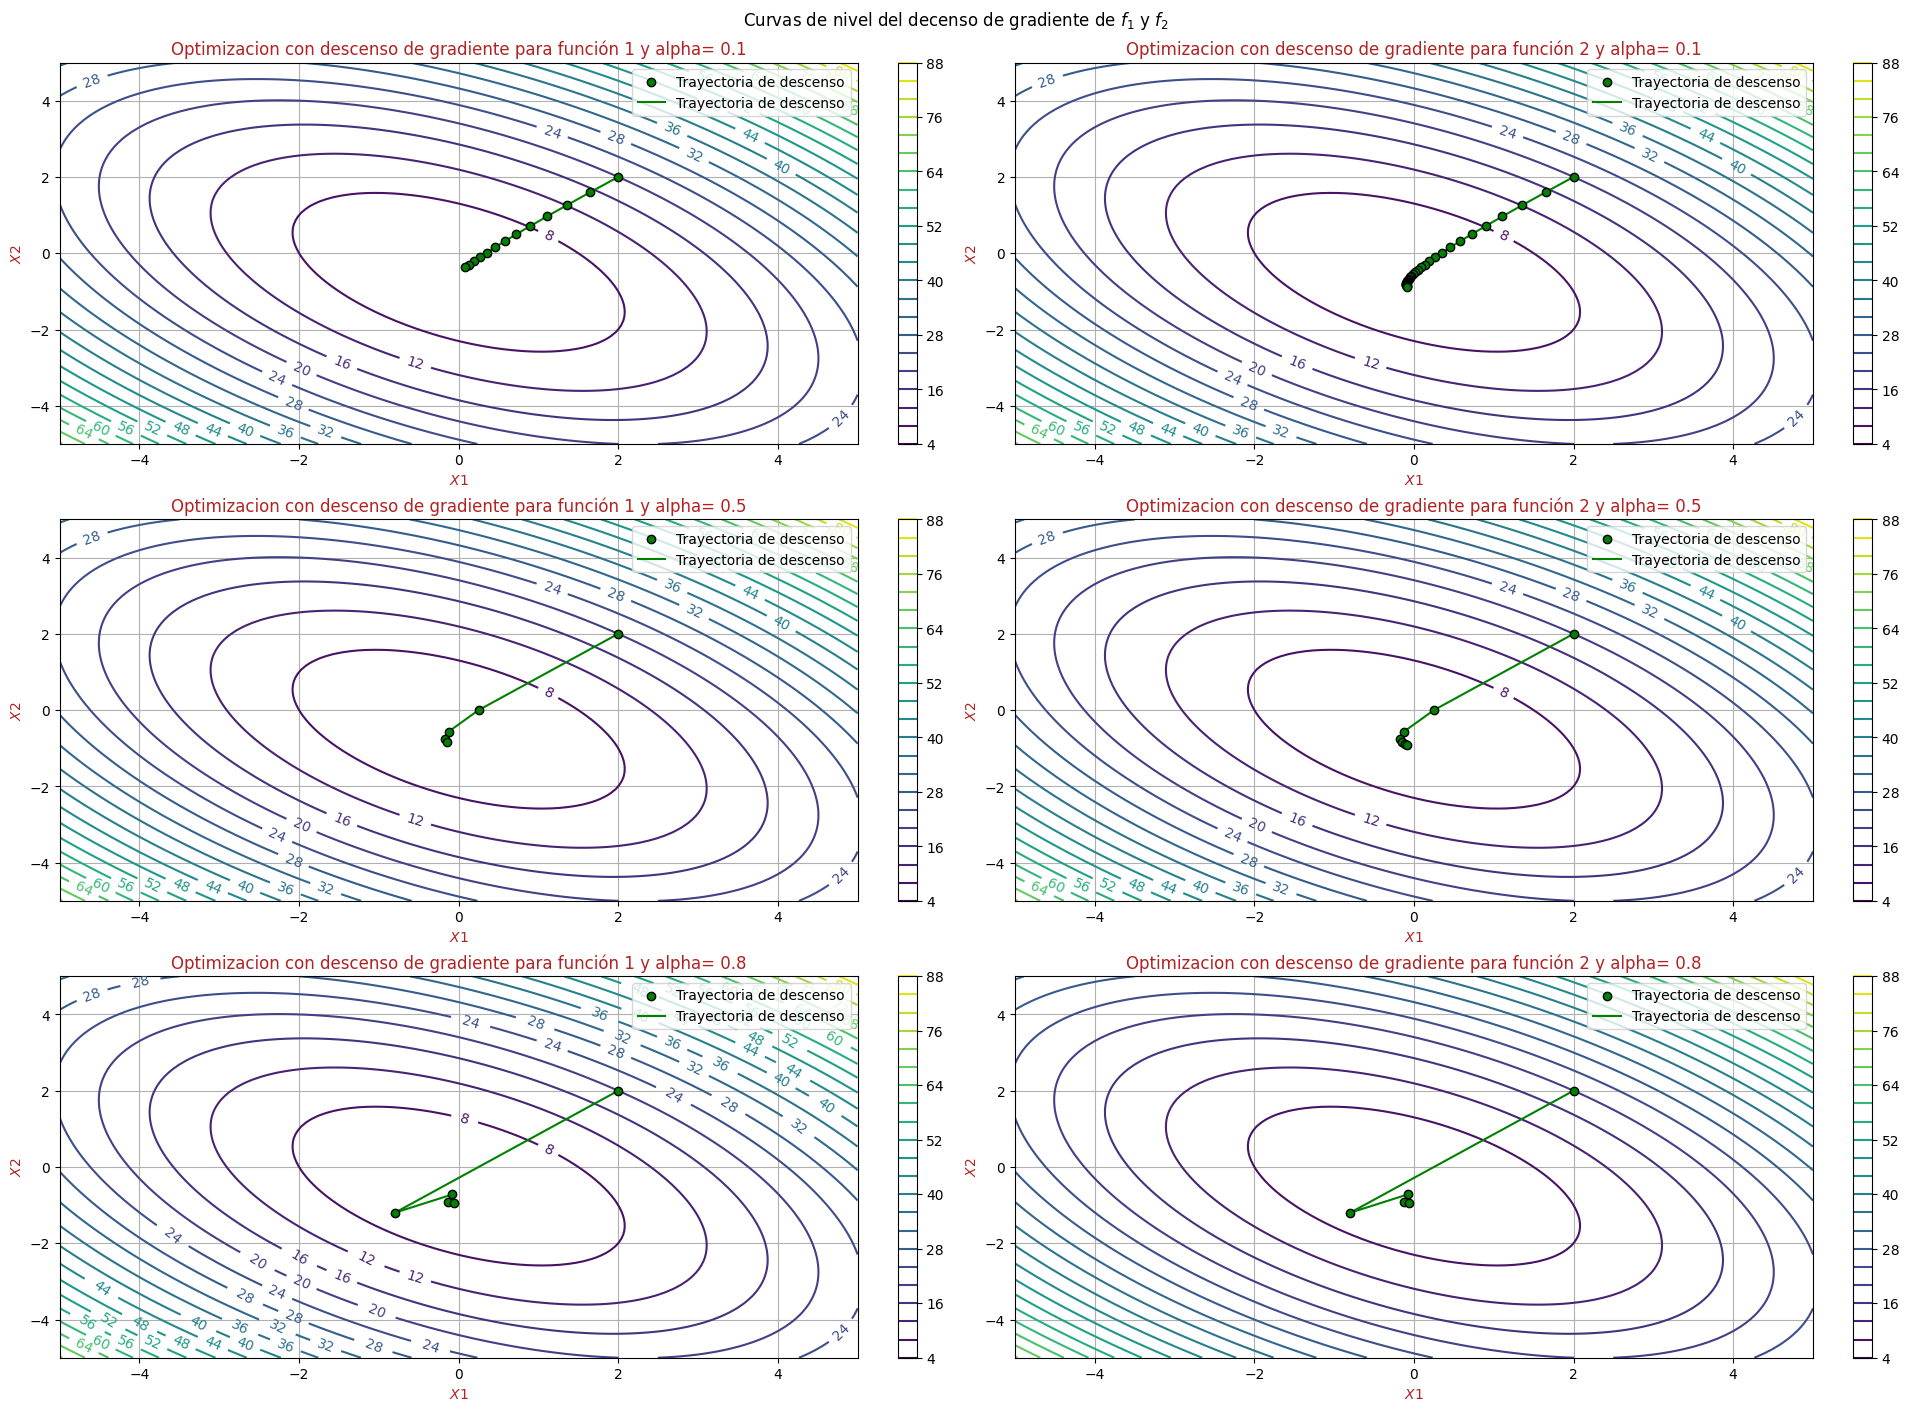

In [69]:
import numpy as np
import matplotlib.pyplot as plt


x_1 = np.linspace(-5,5,100)
x_2 = np.linspace(-5,5,100)
(X_1, X_2) = np.meshgrid(x_1, x_2)

F= np.zeros_like(X_1)
for i in range(len(x_1)):
    for j in range(len(x_1)):
        F[i,j] = parametros_f([X_1[i,j], X_2[i,j]])

n = 100
e = 0.1
X0 = np.array([2, 2])

fig, ax = plt.subplots(3, 2, figsize=(19, 14), layout = 'constrained')

trayectoria= gradiente_descendiente1(X0, 0.1, n, e)
X1=[]
X2=[]
for i in trayectoria[0]:
  X1.append(i[0])
  X2.append(i[1])


cs1 = ax[0,0].contour(X_1, X_2, F, levels=20)

ax[0,0].clabel(cs1, inline=True, fontsize=10)
ax[0,0].scatter(X1, X2, c="green", label="Trayectoria de descenso",zorder=10,edgecolor ="black")
ax[0,0].set_title("Optimizacion con descenso de gradiente para función 1 y alpha= 0.1", color="firebrick")
ax[0,0].set_xlabel("$X1$", color="firebrick")
ax[0,0].set_ylabel("$X2$", color="firebrick")
ax[0,0].grid(True)
ax[0,0].plot(X1, X2, c="green", label="Trayectoria de descenso")
ax[0,0].legend()
fig.colorbar(cs1, ax=ax[0, 0],)

trayectoria= gradiente_descendiente2(X0, 0.1, n, e)
X1=[]
X2=[]
for i in trayectoria[0]:
  X1.append(i[0])
  X2.append(i[1])

cs2 = ax[0,1].contour(X_1, X_2, F, levels=20)

ax[0,1].clabel(cs2, inline=True, fontsize=10)
ax[0,1].scatter(X1, X2, c="green", label="Trayectoria de descenso",zorder=10,edgecolor ="black")
ax[0,1].set_title("Optimizacion con descenso de gradiente para función 2 y alpha= 0.1", color="firebrick")
ax[0,1].set_xlabel("$X1$", color="firebrick")
ax[0,1].set_ylabel("$X2$", color="firebrick")
ax[0,1].grid(True)
ax[0,1].plot(X1, X2, c="green", label="Trayectoria de descenso")
ax[0,1].legend()
fig.colorbar(cs2, ax=ax[0, 1],)

trayectoria= gradiente_descendiente1(X0, 0.5, n, e)
X1=[]
X2=[]
for i in trayectoria[0]:
  X1.append(i[0])
  X2.append(i[1])

cs3 = ax[1,0].contour(X_1, X_2, F, levels=20)

ax[1,0].clabel(cs3, inline=True, fontsize=10)
ax[1,0].scatter(X1, X2, c="green", label="Trayectoria de descenso",zorder=10,edgecolor ="black")
ax[1,0].set_title("Optimizacion con descenso de gradiente para función 1 y alpha= 0.5", color="firebrick")
ax[1,0].set_xlabel("$X1$", color="firebrick")
ax[1,0].set_ylabel("$X2$", color="firebrick")
ax[1,0].grid(True)
ax[1,0].plot(X1, X2, c="green", label="Trayectoria de descenso")
ax[1,0].legend()
fig.colorbar(cs3, ax=ax[1, 0],)

trayectoria= gradiente_descendiente2(X0, 0.5, n, e)
X1=[]
X2=[]
for i in trayectoria[0]:
  X1.append(i[0])
  X2.append(i[1])

cs4 = ax[1,1].contour(X_1, X_2, F, levels=20)

ax[1,1].clabel(cs4, inline=True, fontsize=10)
ax[1,1].scatter(X1, X2, c="green", label="Trayectoria de descenso",zorder=10,edgecolor ="black")
ax[1,1].set_title("Optimizacion con descenso de gradiente para función 2 y alpha= 0.5", color="firebrick")
ax[1,1].set_xlabel("$X1$", color="firebrick")
ax[1,1].set_ylabel("$X2$", color="firebrick")
ax[1,1].grid(True)
ax[1,1].plot(X1, X2, c="green", label="Trayectoria de descenso")
ax[1,1].legend()
fig.colorbar(cs4, ax=ax[1, 1],)

trayectoria= gradiente_descendiente1(X0, 0.8, n, e)
X1=[]
X2=[]
for i in trayectoria[0]:
  X1.append(i[0])
  X2.append(i[1])

cs5 = ax[2,0].contour(X_1, X_2, F, levels=20)

ax[2,0].clabel(cs5, inline=True, fontsize=10)
ax[2,0].scatter(X1, X2, c="green", label="Trayectoria de descenso",zorder=10,edgecolor ="black")
ax[2,0].set_title("Optimizacion con descenso de gradiente para función 1 y alpha= 0.8", color="firebrick")
ax[2,0].set_xlabel("$X1$", color="firebrick")
ax[2,0].set_ylabel("$X2$", color="firebrick")
ax[2,0].grid(True)
ax[2,0].plot(X1, X2, c="green", label="Trayectoria de descenso")
ax[2,0].legend()
fig.colorbar(cs5, ax=ax[2, 0],)

trayectoria= gradiente_descendiente2(X0, 0.8, n, e)
X1=[]
X2=[]
for i in trayectoria[0]:
  X1.append(i[0])
  X2.append(i[1])

cs6 = ax[2,1].contour(X_1, X_2, F, levels=20)

ax[2,1].clabel(cs5, inline=True, fontsize=10)
ax[2,1].scatter(X1, X2, c="green", label="Trayectoria de descenso",zorder=10,edgecolor ="black")
ax[2,1].set_title("Optimizacion con descenso de gradiente para función 2 y alpha= 0.8", color="firebrick")
ax[2,1].set_xlabel("$X1$", color="firebrick")
ax[2,1].set_ylabel("$X2$", color="firebrick")
ax[2,1].grid(True)
ax[2,1].plot(X1, X2, c="green", label="Trayectoria de descenso")
ax[2,1].legend()
fig.colorbar(cs6, ax=ax[2, 1],)

plt.suptitle("Curvas de nivel del decenso de gradiente de $f_1$ y $f_2$")
plt.show()

8. Responda las siguientes preguntas:


  - ¿Que valor de $\alpha$ considera que fue el mejor? ¿por qué?

Un valor de α igual a 0.1 indica que, al multiplicarlo por el gradiente de una respuesta, esta estará definitivamente más cercana a cero que si se multiplicara por 0.5 o 0.8. En consecuencia, $x(k+1)$ será más cercano a x(k), que es la función objetivo, después de implementar el algoritmo de descenso. Otra forma de comprenderlo es que los pasos que se dan son más cortos, pero siguen la misma dirección que el gradiente que me lleva hacia el mínimo. Por lo tanto, un valor menor de alpha conduce a un resultado más preciso. Esto se refleja en las gráficas, ya que con valores mayores de $\alpha$, los saltos son demasiado grandes y, en ocasiones, sobrepasan el valor mínimo. En cambio, con alpha = 0.1, se logra una mayor precisión en cada iteración.


  - ¿Por qué cree que un valor de $\alpha$ muy grande no permite alcanzar la convergencia?


Un algoritmo alcanza la convergencia en un punto o minimizador cuando $x(k)$ se acerca lo más posible a $x(k+1)$, que representa su aproximación al minimizador x*. Esto ocurre cuando el producto entre el valor óptimo de $\alpha$ y el gradiente $∇f(x)$ tiende a cero. Sin embargo, cuando se utiliza un valor de $\alpha$ muy grande, aunque puede acelerar la aproximación al resultado deseado, en ocasiones los saltos en cada iteración serán tan grandes que podrían pasar por alto el minimizador, lo que resultaría en iteraciones adicionales en un esfuerzo por encontrar el minimizador.


  - ¿Qué condición de parada de las dos implementadas considera es mejor en este caso? ¿por qué?

La función 2 implementada en el punto 5 establece como condición de parada que $||∇𝑓(𝑥[𝑘])||₂ ≤ ε$. Por otro lado, en la función 1 implementada en el punto 4, se utiliza la condición de parada $||𝑥[𝑘+1]−𝑥[𝑘]||₂ ≤ ε$. Ambas condiciones son adecuadas ya que representan los criterios para encontrar el minimizador: que el gradiente sea cercano a cero y que la diferencia entre las iteraciones sucesivas, $||𝑥[𝑘+1]−𝑥[𝑘]||₂$, sea pequeña.

Sin embargo, al analizar los resultados observados en las gráficas y los valores históricos registrados, se nota que la condición de parada basada en ||$∇𝑓(𝑥[𝑘])||₂$ ≤ ε requiere un mayor número de iteraciones para converger. Esto implica un acercamiento más preciso al valor real del minimizador. Es importante destacar que la elección de la condición de parada depende del contexto en el que se aplique el algoritmo de búsqueda, ya que no en todas las circunstancias el gradiente o la aproximación de $𝑥(𝑘)$ respecto a $𝑥(𝑘+1)$ serán indicativos igualmente efectivos.


  - ¿Qué pasaría si se usa el descenso de gradiente con una forma cuadrática no convexa?

La propiedad de convexidad es fundamental en el algoritmo de descenso de gradiente, ya que permite identificar los puntos en los que existe un mínimo global del problema. En estos puntos, el gradiente se anula y su segunda derivada es positiva definida, lo que se refleja en la forma gráfica de una función cuadrática con un "valle" bien definido.

En el caso de una función convexa, tenemos la certeza de que el punto donde el gradiente se anula y donde $x(k)$ sea igual a $x(k+a)$ representa un mínimo global. Sin embargo, en funciones no convexas, esta certeza desaparece, ya que pueden existir múltiples mínimos locales y máximos que dependen en gran medida de nuestro punto de inicio en el algoritmo y que generan las condiciones necesarias para que el algorìtmo de busqueda se detenga. Esto significa que, según dónde comencemos la búsqueda, podríamos obtener resultados diferentes, lo que hace que el proceso de optimización sea más desafiante en este contexto.